In [1]:
import sys; sys.path.append('..')
import matplotlib.pyplot as plt
import random
import math
from itertools import islice

import datagen as dg

random.seed(0)

In [2]:
cfg = dg.config.Config()
env = dg.types.Environment.from_config(cfg)
wts = [dg.types.WindTurbine.from_env(env)
       for _ in range(3)]
sim = dg.types.Simulation(cfg, wts, env).tick(10)

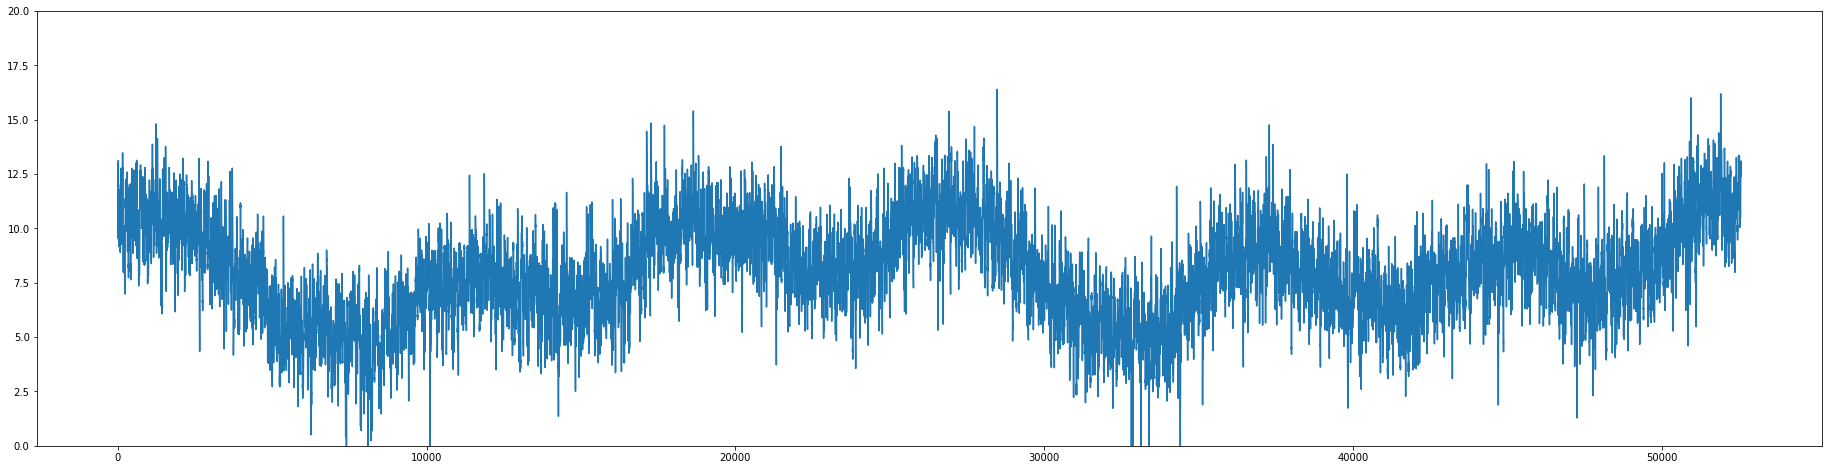

CPU times: user 1.82 s, sys: 144 ms, total: 1.96 s
Wall time: 1.72 s


In [3]:
%%time
N = int(6 * 365 * 24 * 60 * 60 / cfg.tick_freq)

readings = [sim.tick().get_readings() for _ in range(N)]
plt.figure(figsize=(32, 8))
plt.plot([d['env_temp'] for d in readings])
plt.ylim(0, 20)
plt.show()

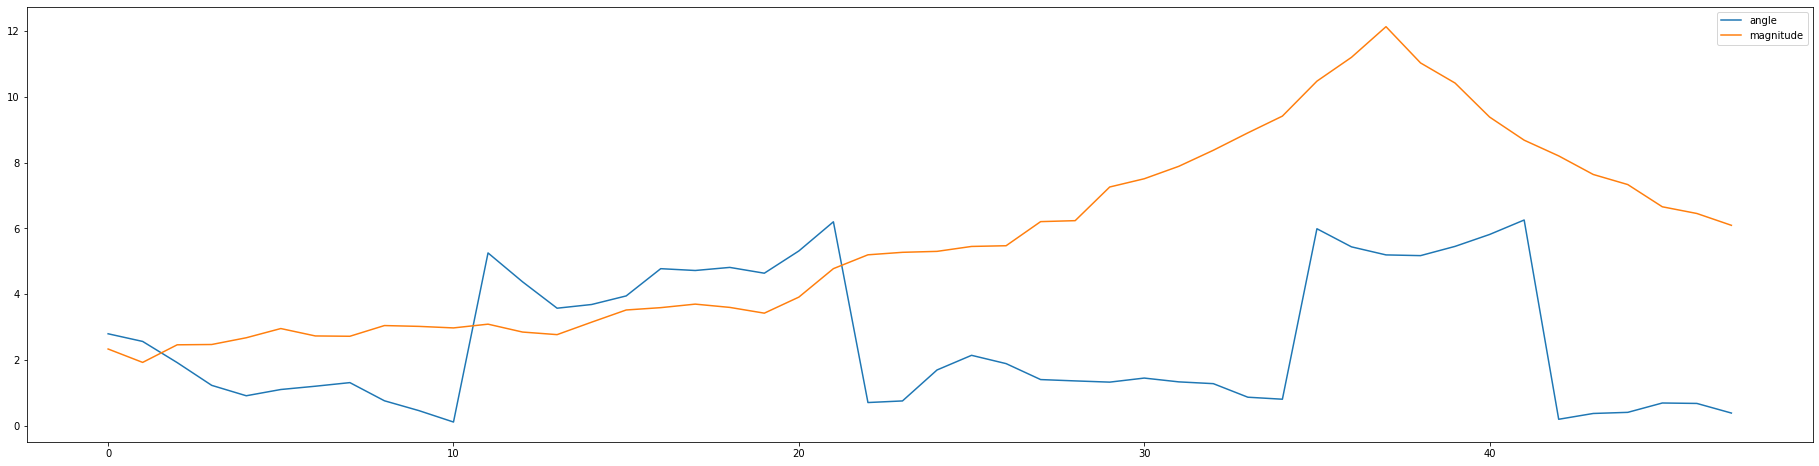

In [4]:
N = int(2 * 24 * 60 * 60 / cfg.tick_freq)
readings = [sim.tick().get_readings() for _ in range(N)]

plt.figure(figsize=(32, 8))
plt.plot([d['env_wind_angle'] for d in readings], label='angle')
plt.plot([d['env_wind_mag'] for d in readings], label='magnitude')
plt.legend()
plt.show()

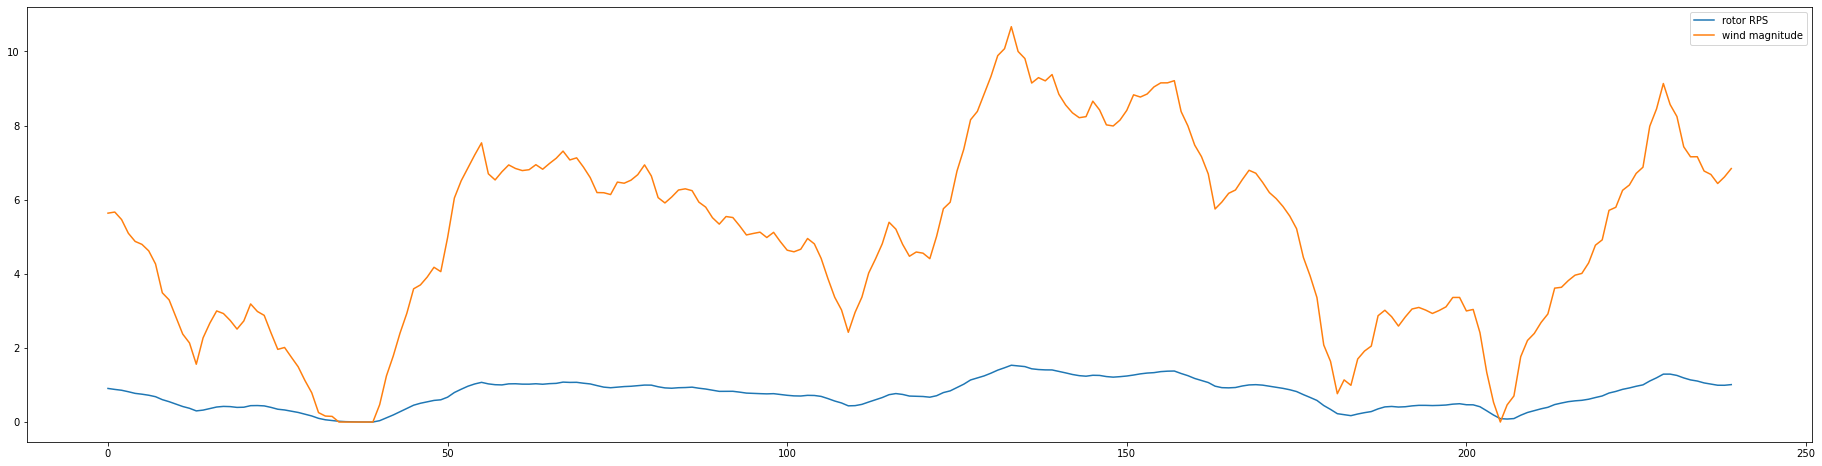

In [5]:
N = int(10 * 24 * 60 * 60 / cfg.tick_freq)
readings = [sim.tick().get_readings() for _ in range(N)]

plt.figure(figsize=(32, 8))
plt.plot([d['wts'][0]['rotor_rps'] for d in readings], label='rotor RPS')
plt.plot([d['env_wind_mag'] for d in readings], label='wind magnitude')
plt.legend()
plt.show()